In [19]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0
)

load rnnSMAP


In [16]:
opt['model'] = 'open'
opt['out'] = 'open_loop'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.034185171127319336
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.03041982650756836
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.028562307357788086
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.028241872787475586
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.0345311164855957
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.02328205108642578
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.019068241119384766
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.015224218368530273
(100, 19)
(100, 1)
(100, 19)
(100, 1)
(100, 19)
(100, 1)
(100, 19)
(100, 1)
(100, 19)
(100, 1)
(100, 1

KeyboardInterrupt: 

In [20]:
out = 'open_loop'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [21]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.03619718551635742
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.01687026023864746
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.019742965698242188
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.03142285346984863
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.015278100967407227
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.015733003616333008
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.029147863388061523
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.018772125244140625
(28, 19)
(28, 1)


/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_cell_open_loop' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/open_loop/test_CONUSv16f1_2017_2017_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/open_loop/test_CONUSv16f1_2017_2017_ep500.csv


In [22]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015, 2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.026699066162109375
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.02166295051574707
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/APCP_FORA.csv 0.018296003341674805
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/APCP_FORA.csv 0.01617884635925293
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DLWRF_FORA.csv 0.015633821487426758
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DLWRF_FORA.csv 0.0160369873046875
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DSWRF_FORA.csv 0.01875782012939453
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DSWRF_FORA.csv 0.026257753372192383
read /Users/rajdesai/Desktop/H

/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_cell_open_loop' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/open_loop/test_CONUSv16f1_2015_2016_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/open_loop/test_CONUSv16f1_2015_2016_ep500.csv


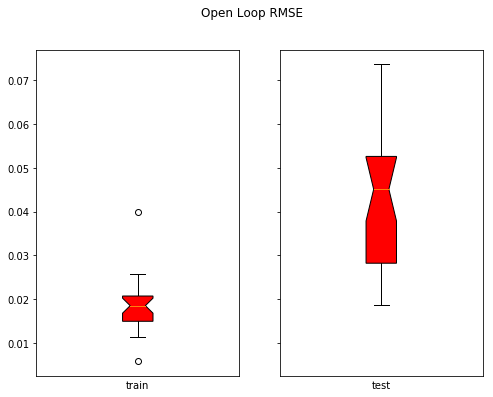

In [24]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test'], title='Open Loop ' + strE)